In [33]:
# Import libraries and process training and test data

import scipy
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

mnist = scipy.io.loadmat('/Users/pranavreddy/Desktop/ECE 174/Project1/mnist.mat')

trainX = np.array(mnist['trainX'])
trainY = np.array(mnist['trainY']).transpose().astype(int)

trainX = trainX / np.max(trainX)

testX = np.array(mnist['testX']).astype(float)
testY = np.array(mnist['testY']).transpose()

testX = testX / np.max(testX)

labels = np.arange(0, 10)

In [34]:
# Generate random matrices
# I fixed seed for reproducibility when comparing difference feature mappings
L = 1000
np.random.seed(123)
W = np.random.normal(0, 1, (trainX.shape[1], L))
b = np.random.normal(0,1, (1, L))
b = np.repeat(b, trainX.shape[0], axis=0)

print(b.shape)

# Helper methods to apply feature mappings given random matrices W and b
def identity(x, W, b):
    n = (x.shape)[0]
    return np.hstack((np.ones((n,1)), np.matmul(x, W)+b[:n, :W.shape[1]]))
def sin(x, W, b):
    n = (x.shape)[0]
    x = np.matmul(x, W)+b[:n, :W.shape[1]]
    x = np.sin(2 * np.pi * x / 180)
    return np.hstack((np.ones((n,1)), x))
def relu(x, W, b):
    n = (x.shape)[0]
    x = np.matmul(x, W)+b[:n, :W.shape[1]]
    x = x * (x > 0)
    return np.hstack((np.ones((n,1)), x))
def sigmoid(x, W, b):
    n = (x.shape)[0]
    x = np.matmul(x, W)+b[:n, :W.shape[1]]
    x = scipy.special.expit(x)
    return np.hstack((np.ones((n,1)), x))

# Compute feature mappings
identity_train_X = identity(trainX, W, b)
identity_test_X = identity(testX, W, b)

sigmoid_train_X = sigmoid(trainX, W, b)
sigmoid_test_X = sigmoid(testX, W, b)

sin_train_X = sin(trainX, W, b)
sin_test_X = sin(testX, W, b)

relu_train_X = relu(trainX, W, b)
relu_test_X = relu(testX, W, b)

(60000, 1000)


In [35]:
# Helper methods to create models for each different feature mapping

def create_model(x, y, labels):
    XTX = np.matmul(x.transpose(), x)
    XTX_pinv = np.linalg.pinv(XTX)
    XTX_pinv_XT = np.matmul(XTX_pinv,x.transpose())
    model = []
    for i in range(len(labels)):
        binary = np.copy(y)
        binary[binary != labels[i]] = -1
        binary[binary == labels[i]] = 1
        model.append(np.matmul(XTX_pinv_XT,binary))
    model=np.concatenate(model,axis=1)
    return model
def predict_one_vs_all(x, model):
    predictions = np.matmul(x, model)
    predictions = np.argmax(predictions, axis = 1)
    return predictions

# Helper methods to analyze errors and generate confusion matrices
def create_model_error_analysis(trueY, predictions):
    error = 0
    for i in range(len(predictions)):
        if(predictions[i] != trueY[i]):
            error = error + 1
    error = (error / len(trueY)) * 100
    return error
def plot_confusion_matrix(trueY, predictions, labels, colors, feature_type, data_type):
    display=metrics.ConfusionMatrixDisplay.from_predictions(trueY, predictions,labels=labels, cmap=colors)
    plt.title(f'Error: {create_model_error_analysis(trueY, predictions):.2f}%')
    plt.show()
    display.figure_.savefig(f'/Users/pranavreddy/Desktop/ECE 174/Project1/images/one_vs_all_{data_type.lower()}_confusion_matrix_{feature_type}.eps')


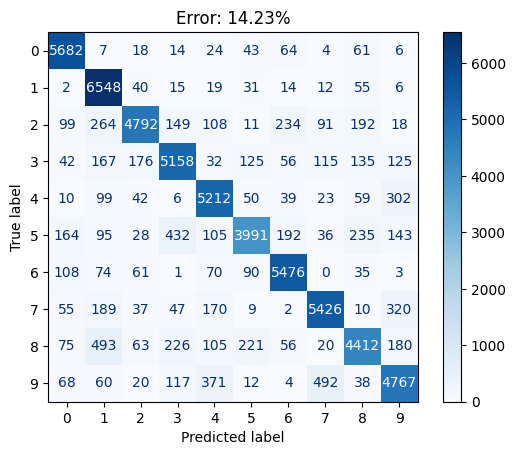

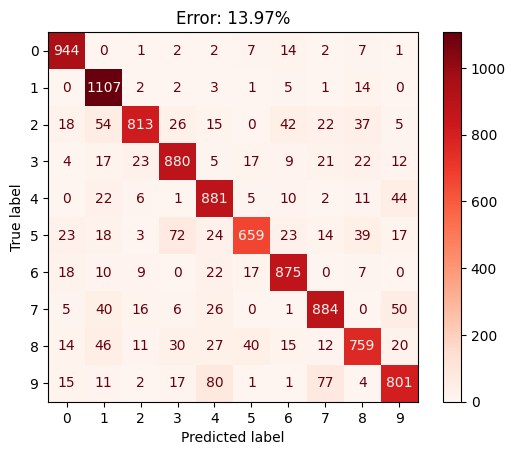

In [36]:
# Compute and create error analysis of identity feature mapping
one_vs_all_model=create_model(identity_train_X, trainY, labels)
one_vs_all_train_predictions = predict_one_vs_all(identity_train_X, one_vs_all_model)
one_vs_all_test_predictions = predict_one_vs_all(identity_test_X, one_vs_all_model)

plot_confusion_matrix(trainY, one_vs_all_train_predictions, labels, 'Blues', "Identity", "Training")
plot_confusion_matrix(testY, one_vs_all_test_predictions, labels, 'Reds', "Identity", "Test")

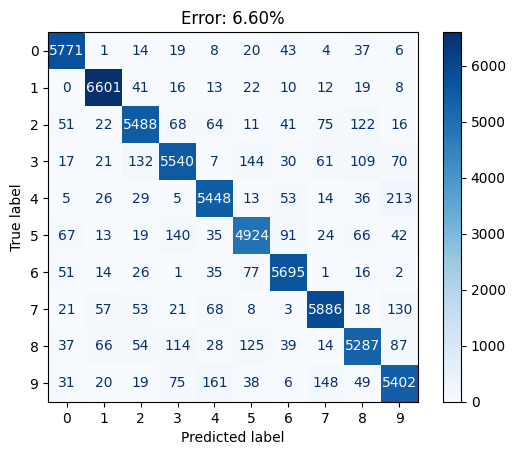

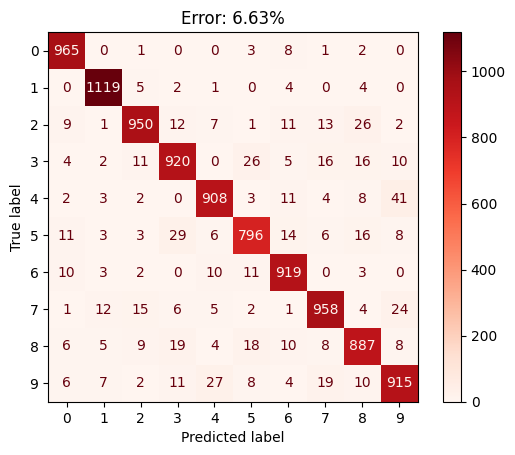

In [37]:
# Compute and create error analysis of sigmoid feature mapping
one_vs_all_model = create_model(sigmoid_train_X, trainY, labels)
one_vs_all_train_predictions = predict_one_vs_all(sigmoid_train_X, one_vs_all_model)
one_vs_all_test_predictions = predict_one_vs_all(sigmoid_test_X, one_vs_all_model)

plot_confusion_matrix(trainY, one_vs_all_train_predictions, labels, 'Blues', "Sigmoid", "Training")
plot_confusion_matrix(testY, one_vs_all_test_predictions, labels, 'Reds', "Sigmoid", "Test")

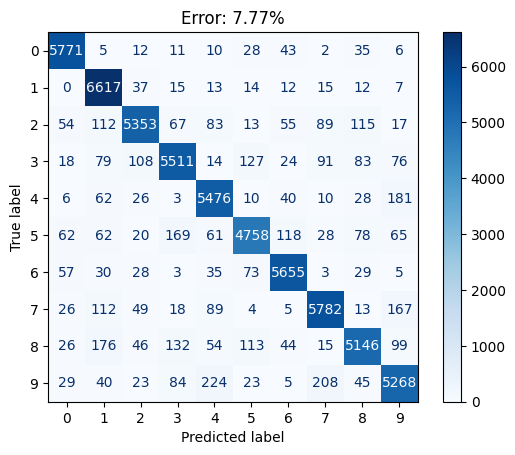

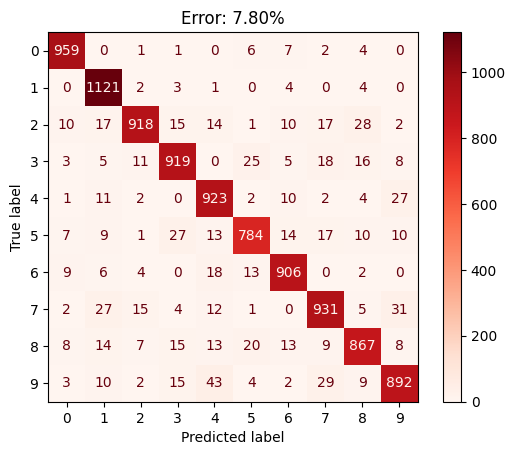

In [38]:
# Compute and create error analysis of sinusoid feature mapping
one_vs_all_model=create_model(sin_train_X, trainY, labels)
one_vs_all_train_predictions = predict_one_vs_all(sin_train_X, one_vs_all_model)
one_vs_all_test_predictions = predict_one_vs_all(sin_test_X, one_vs_all_model)

plot_confusion_matrix(trainY, one_vs_all_train_predictions, labels, 'Blues', "Sine", "Training")
plot_confusion_matrix(testY, one_vs_all_test_predictions, labels, 'Reds', "Sine", "Test")

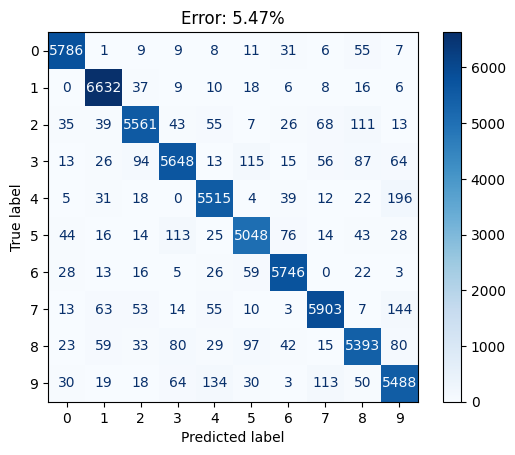

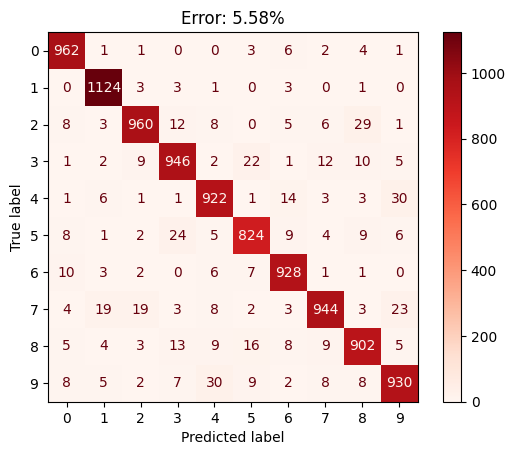

In [39]:
# Compute and create error analysis of ReLU feature mapping
one_vs_all_model=create_model(relu_train_X, trainY, labels)
one_vs_all_train_predictions = predict_one_vs_all(relu_train_X, one_vs_all_model)
one_vs_all_test_predictions = predict_one_vs_all(relu_test_X, one_vs_all_model)

plot_confusion_matrix(trainY, one_vs_all_train_predictions, labels, 'Blues', "ReLU", "Training")
plot_confusion_matrix(testY, one_vs_all_test_predictions, labels, 'Reds', "ReLU", "Test")

In [8]:
# Code to generate models with varying number of features and compute error rate for each

L_range = np.arange(1, 1002, 10)

identity_training_error  = np.empty(L_range.shape)
identity_test_error  = np.empty(L_range.shape)

sigmoid_training_error  = np.empty(L_range.shape)
sigmoid_test_error  = np.empty(L_range.shape)

sin_training_error  = np.empty(L_range.shape)
sin_test_error  = np.empty(L_range.shape)

relu_training_error  = np.empty(L_range.shape)
relu_test_error  = np.empty(L_range.shape)

for i in range(len(L_range)):
    w_prime = W[:,:L_range[i]]
    
    identity_train_X = identity(trainX, w_prime, b)
    identity_test_X = identity(testX, w_prime, b)
    one_vs_all_model=create_model(identity_train_X, trainY, labels)
    one_vs_all_train_predictions = predict_one_vs_all(identity_train_X, one_vs_all_model)
    one_vs_all_test_predictions = predict_one_vs_all(identity_test_X, one_vs_all_model)
    identity_training_error[i] = create_model_error_analysis(trainY, one_vs_all_train_predictions)
    identity_test_error[i] = create_model_error_analysis(testY, one_vs_all_test_predictions)

    sigmoid_train_X = sigmoid(trainX, w_prime, b)
    sigmoid_test_X = sigmoid(testX, w_prime, b)
    one_vs_all_model=create_model(sigmoid_train_X, trainY, labels)
    one_vs_all_train_predictions = predict_one_vs_all(sigmoid_train_X, one_vs_all_model)
    one_vs_all_test_predictions = predict_one_vs_all(sigmoid_test_X, one_vs_all_model)
    sigmoid_training_error[i] = create_model_error_analysis(trainY, one_vs_all_train_predictions)
    sigmoid_test_error[i] = create_model_error_analysis(testY, one_vs_all_test_predictions)

    sin_train_X = sin(trainX, w_prime, b)
    sin_test_X = sin(testX, w_prime, b)
    one_vs_all_model=create_model(sin_train_X, trainY, labels)
    one_vs_all_train_predictions = predict_one_vs_all(sin_train_X, one_vs_all_model)
    one_vs_all_test_predictions = predict_one_vs_all(sin_test_X, one_vs_all_model)
    sin_training_error[i] = create_model_error_analysis(trainY, one_vs_all_train_predictions)
    sin_test_error[i] = create_model_error_analysis(testY, one_vs_all_test_predictions)

    relu_train_X = relu(trainX, w_prime, b)
    relu_test_X = relu(testX, w_prime, b)
    one_vs_all_model=create_model(relu_train_X, trainY, labels)
    one_vs_all_train_predictions = predict_one_vs_all(relu_train_X, one_vs_all_model)
    one_vs_all_test_predictions = predict_one_vs_all(relu_test_X, one_vs_all_model)
    relu_training_error[i] = create_model_error_analysis(trainY, one_vs_all_train_predictions)
    relu_test_error[i] = create_model_error_analysis(testY, one_vs_all_test_predictions)

(60000, 784)
(784, 1)
(60000, 784)
(784, 11)
(60000, 784)
(784, 21)
(60000, 784)
(784, 31)
(60000, 784)
(784, 41)
(60000, 784)
(784, 51)
(60000, 784)
(784, 61)
(60000, 784)
(784, 71)
(60000, 784)
(784, 81)
(60000, 784)
(784, 91)
(60000, 784)
(784, 101)
(60000, 784)
(784, 111)
(60000, 784)
(784, 121)
(60000, 784)
(784, 131)
(60000, 784)
(784, 141)
(60000, 784)
(784, 151)
(60000, 784)
(784, 161)
(60000, 784)
(784, 171)
(60000, 784)
(784, 181)
(60000, 784)
(784, 191)
(60000, 784)
(784, 201)
(60000, 784)
(784, 211)
(60000, 784)
(784, 221)
(60000, 784)
(784, 231)
(60000, 784)
(784, 241)
(60000, 784)
(784, 251)
(60000, 784)
(784, 261)
(60000, 784)
(784, 271)
(60000, 784)
(784, 281)
(60000, 784)
(784, 291)
(60000, 784)
(784, 301)
(60000, 784)
(784, 311)
(60000, 784)
(784, 321)
(60000, 784)
(784, 331)
(60000, 784)
(784, 341)
(60000, 784)
(784, 351)
(60000, 784)
(784, 361)
(60000, 784)
(784, 371)
(60000, 784)
(784, 381)
(60000, 784)
(784, 391)
(60000, 784)
(784, 401)
(60000, 784)
(784, 411)
(60

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


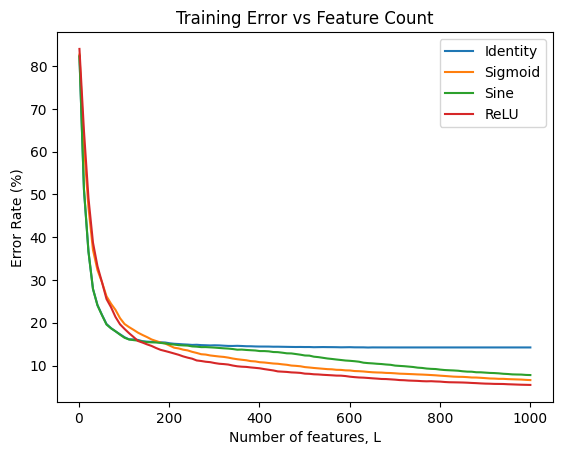

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


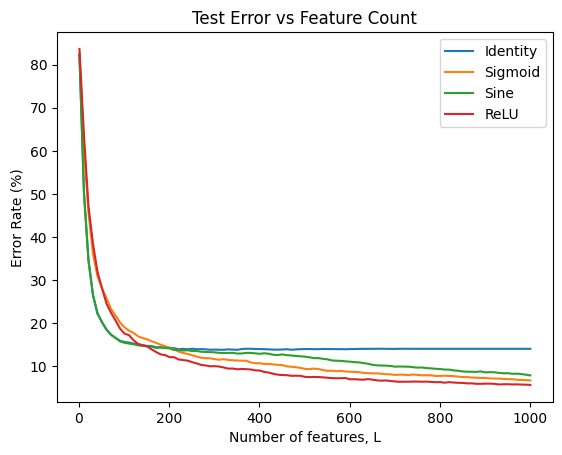

In [41]:
# Plot graphs of Error Rate vs Feature Count for each feature mapping on training dataset

plt.plot(L_range, identity_training_error, label = "Identity")
plt.plot(L_range, sigmoid_training_error, label = "Sigmoid")
plt.plot(L_range, sin_training_error, label = "Sine")
plt.plot(L_range, relu_training_error, label = "ReLU")
plt.legend()
plt.title('Training Error vs Feature Count')
plt.xlabel('Number of features, L')
plt.ylabel('Error Rate (%)')
plt.savefig(f'/Users/pranavreddy/Desktop/ECE 174/Project1/images/one_vs_all_training_error_vs_features.eps', format='eps')
plt.show()

# Plot graphs of Error Rate vs Feature Count for each feature mapping on test dataset
plt.plot(L_range, identity_test_error, label = "Identity")
plt.plot(L_range, sigmoid_test_error, label = "Sigmoid")
plt.plot(L_range, sin_test_error, label = "Sine")
plt.plot(L_range, relu_test_error, label = "ReLU")
plt.legend()
plt.title('Test Error vs Feature Count')
plt.xlabel('Number of features, L')
plt.ylabel('Error Rate (%)')
plt.savefig(f'/Users/pranavreddy/Desktop/ECE 174/Project1/images/one_vs_all_test_error_vs_features.eps', format='eps')
plt.show()